In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import h5py
import glob
sys.path.insert(1, '/home/lars/predatorprey-1/predprey-staticnw/')
from animateSwarm import AnimateTools as at
from TsTools import general as gen
from pathlib import Path
import pickle
from functools import partial
from vmodel import geometry as vgeom
from vmodel import plot
from vmodel.util import color as vcolor

In [2]:
def filter_front_target(pos, vel, target):
    vel_self = vel[target]
    pos_self = pos[target]
    pos = np.delete(pos, target, axis=0)
    pos = pos - pos_self
    
    
    
    
    out_idx = []
    for i in range(len(pos)):
        
        ort_pv = [0,0]
        ort_pv[0] = -vel_self[1]
        ort_pv[1] = vel_self[0]
        
        r_pi = np.array(pos[i])
        if (-r_pi[0] * ort_pv[1] + r_pi[1] * ort_pv[0] < 0):
            out_idx.append(i)
            
    return out_idx
        
def pavas2colors(pavas):
    if np.std(pavas) > 1e-5:
        colors = np.squeeze(pavas)
        colors -= colors.min()
        colors /= colors.max()
    else:
        colors = 'k'
    return colors

In [3]:
#file_h5 = str(file)+".h5"
#file_dat = str(file)+".dat"



mode = 'gif' # 'normal', 'pictures', 'movie', 'gif'
fps = 15
dpi = 200
NsamShow = 4
sizePrey = 1/8
sizePred = sizePrey * 2
cmap = plt.get_cmap('coolwarm') # alternatives 'bwr', 'Reds'


file_h5 = "/home/lars/vmodel/output/state.nc"
name = "state"


with h5py.File(file_h5) as fh5:


    pos = np.moveaxis(np.array(fh5['/position']), [3,2], [1,3])[0,:,:,:]
    vel = np.moveaxis(np.array(fh5['/velocity']), [3,2], [1,3])[0,:,:,:]

    
print(pos)
idx_front = filter_front_target(pos, vel, 0)
idx_all = list(range(len(pos)))
print(idx_all)


pos_front = pos[idx_front]
vel_front = vel[idx_front]




posDat = at.datCollector( pos )
velDat = at.datCollector( vel )
positions = [posDat]


# comment line below for colors representing alignment strength
colors = 'k'
# get info from files
time, N, _ = posDat.dat.shape 

[[[-20.         -20.        ]
  [  7.57609274   1.47625813]
  [ -8.29143901  -0.70359824]
  ...
  [  5.84386851  -6.88923655]
  [ -1.03711997  -2.04665478]
  [  3.86776974  -2.3609478 ]]

 [[-19.7861315  -19.78961876]
  [  7.67595264   1.48154977]
  [ -8.19666084  -0.67170624]
  ...
  [  5.93652052  -6.92686108]
  [ -1.129217    -2.07850368]
  [  3.919844    -2.27557642]]

 [[-19.57232714 -19.57917234]
  [  7.77595231   1.4818044 ]
  [ -8.10083064  -0.6431305 ]
  ...
  [  6.03227624  -6.95568542]
  [ -1.22329947  -2.10421937]
  [  3.96734242  -2.18757699]]

 ...

 [[  2.00272826  31.22941666]
  [  6.83795296   4.66618815]
  [  3.41866781   1.82331883]
  ...
  [ 14.10762966   5.24010477]
  [  5.5472061    6.14796985]
  [ 10.13334271   8.22125899]]

 [[  2.03749819  31.52739493]
  [  6.9079176    4.73763707]
  [  3.50328897   1.87660353]
  ...
  [ 14.19630175   5.28633529]
  [  5.63129374   6.20209258]
  [ 10.14697831   8.32032498]]

 [[  2.07226811  31.82537321]
  [  6.97404925   4.8126

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
f, ax = plt.subplots(1)
ax.axis('off')
ax.set_aspect('equal')
# Collect update-tasks
#preds.colors = "r"
posDat.colors = "b"
tasks = at.taskCollector()


tasks.append( at.Limits4Pos(positions, ax) )
tasks.append( at.headAndTail(posDat, ax))
#print(pos[:][1])
tasks.append(at.plot_nselect_visual(ax, pos))

#tasks.append( at.headAndTail(preds, ax))
#tasks.append( at.headAndTail(preds_back_plot, ax))
# animation
interval = 1000*(1/fps) # interval in ms
anim = animation.FuncAnimation(f, tasks.update, interval=interval,
                               frames=range(0-1, time), repeat=True)


plt.show()
anim.save(name + '.mp4', writer='ffmpeg', dpi=dpi, bitrate=-1, codec='libx264')

In [13]:
import random
import math
random.randint(4,9,10)


TypeError: randint() takes 3 positional arguments but 4 were given

In [32]:
np.random.normal(0,1)

0.4582737473663741

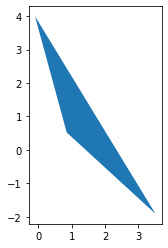

In [40]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import geopandas as gpd

polygon1 = Polygon([(2.12,9),
                    (1,1),
                    (3,0),
                    ])
polygon1 = Polygon([(0.8537029150157097, 0.5207603411298521), (-0.09656090877618911, 3.9988343290134334), (3.5113725688390285, -1.9157929644940244)])
p = gpd.GeoSeries(polygon1)
p.plot()
plt.show()